# Tree Based Models

In this notebook, we will model the relation between weather data and adjusted bike trips using decision tree regression model, as well as boosting algorithm based on decision trees.

Previously, we were assuming our model takes the form $T(t) + f(X)$, where $T(t)$ is the trend, $f(X)$ is the model based on weather.
However, since the magnitude of the seasonality seems to increase over time, it may make sense to assume a multiplicative model $T(t)*f(X)$.

In this alternative version of tree model notebook, we will de-trend data according to this multiplicative model. Specifically, we set 'adj_num_trips' as our de-trended data, which is equal to 'num_trip'/'trend'. After we make prediction of 'adj_num_trips', we multiply it by 'trend' to recover the trended prediction. Then we compute rmse based on trended prediction and compare models.

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
# import training data
bike_train = pd.read_csv('../EDA/bikeshare_train_data_v2.csv', parse_dates=['Date'])

In [4]:
bike_train['adj_num_trips'] = bike_train['num_trips']/bike_train['trend']

'adj_num_trips' is our de-trended data. We will make our predictions of 'adj_num_trips' and then multiply the prediction by 'trend' to recover the trended prediction.

In [5]:

bike_test = pd.read_csv('../EDA/bikeshare_test_data_v2.csv', parse_dates=['Date'])

In [8]:
bike_test['adj_num_trips'] = bike_test['num_trips']/bike_test['trend']

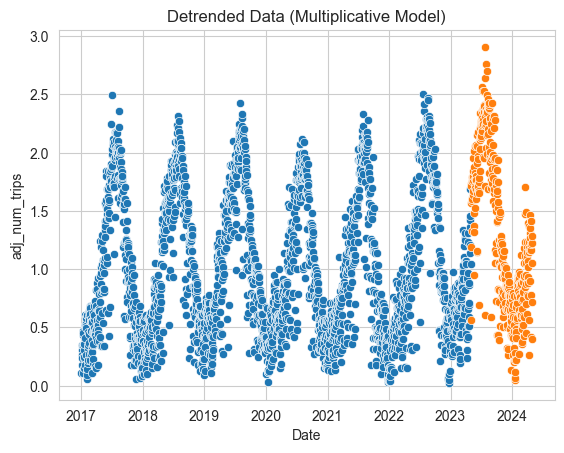

In [43]:
sns.scatterplot(x=bike_train['Date'], y=bike_train['adj_num_trips'])
sns.scatterplot(x=bike_test['Date'], y=bike_test['adj_num_trips'])
plt.title('Detrended Data (Multiplicative Model)')
plt.show()

## Decision Tree Regressor

We first build a decision tree regressor with feature set chosen from 'max_temp', 'hdd', 'total_precip'. These features are selected based on previous EDA.

In [10]:
features = ['max_temp', 'total_precip', 'day_length', 'snow_on_ground', 'max_gust']

In [11]:
# define powerset function to return all subset of a list

from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
MAX_DEPTH = 10

In [15]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=16, shuffle=True)

In [16]:
mses_train = np.zeros((5,2**len(features)-1,MAX_DEPTH))
mses_val = np.zeros((5,2**len(features)-1,MAX_DEPTH))
# the first component refers to validation number, the second component refers to the feature used, 
# the third refers to the max_depth of the tree

In [17]:
cv_count = 0

for train_index, test_index in kfold.split(bike_train):
    feature_count = 0
    cv_train = bike_train.iloc[train_index]
    cv_val = bike_train.iloc[test_index]
    for feature in powerset(features):
        feature = list(feature)
        if len(feature) > 0:
            print('feature_count is ', feature_count)
            for max_depth in range(1,MAX_DEPTH+1):
                print(f'Fitting tree model with features {feature} and max depth {max_depth}')
                tree = DecisionTreeRegressor(max_depth = max_depth)
                tree.fit(cv_train[feature],cv_train['adj_num_trips'])
        
                # predict
                pred_train = tree.predict(cv_train[feature])
                pred_val = tree.predict(cv_val[feature])
                
                # compute mse and store
                mse_train = np.sqrt(mean_squared_error(cv_train['num_trips'], pred_train*cv_train['trend']))
                mse_val = np.sqrt(mean_squared_error(cv_val['num_trips'], pred_val*cv_val['trend']))
                mses_train[cv_count,feature_count,max_depth-1] = mse_train
                mses_val[cv_count,feature_count,max_depth-1] = mse_val
                
                # plot the in-sample and out-of-sample prediction with true values
#                 fig, ax = plt.subplots(1,2,figsize = (12,5))
#                 sns.scatterplot(x=bike_train['time'], y=bike_train['adj_num_trips'], ax=ax[0], color='blue', alpha=0.5)
#                 sns.scatterplot(x=bike_train['time'], y=pred_train, ax=ax[0], color='orange')
            
#                 sns.scatterplot(x=bike_test['time'], y=bike_test['adj_num_trips'], ax=ax[1], color='blue', alpha=0.5)
#                 sns.scatterplot(x=bike_test['time'], y=pred_test, ax=ax[1], color='orange') 
            
#                 plt.show()
            
                # plot the residue plot
            
#                 if len(feature) == 1:
                
#                     fig, ax = plt.subplots(1,2,figsize = (12,5))
#                     sns.scatterplot(x=bike_train[feature[0]], y=bike_train['adj_num_trips'] - pred_train, ax=ax[0], color='green')
#                     sns.scatterplot(x=bike_test[feature[0]], y=bike_test['adj_num_trips'] - pred_test, ax=ax[1], color='green')
#                     ax[0].set_title(f'Residue plot of adj_num_trips against {feature[0]} in training data')
#                     ax[1].set_title(f'Residue plot of adj_num_trips against {feature[0]} in testing data')
                
#                     plt.show()
            feature_count += 1
    cv_count += 1

feature_count is  0
Fitting tree model with features ['max_temp'] and max depth 1
Fitting tree model with features ['max_temp'] and max depth 2
Fitting tree model with features ['max_temp'] and max depth 3
Fitting tree model with features ['max_temp'] and max depth 4
Fitting tree model with features ['max_temp'] and max depth 5
Fitting tree model with features ['max_temp'] and max depth 6
Fitting tree model with features ['max_temp'] and max depth 7
Fitting tree model with features ['max_temp'] and max depth 8
Fitting tree model with features ['max_temp'] and max depth 9
Fitting tree model with features ['max_temp'] and max depth 10
feature_count is  1
Fitting tree model with features ['total_precip'] and max depth 1
Fitting tree model with features ['total_precip'] and max depth 2
Fitting tree model with features ['total_precip'] and max depth 3
Fitting tree model with features ['total_precip'] and max depth 4
Fitting tree model with features ['total_precip'] and max depth 5
Fitting t

Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 9
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 10
feature_count is  22
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 1
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 2
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 3
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 4
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 5
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 6
Fitting tree model with features [

Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 10
feature_count is  0
Fitting tree model with features ['max_temp'] and max depth 1
Fitting tree model with features ['max_temp'] and max depth 2
Fitting tree model with features ['max_temp'] and max depth 3
Fitting tree model with features ['max_temp'] and max depth 4
Fitting tree model with features ['max_temp'] and max depth 5
Fitting tree model with features ['max_temp'] and max depth 6
Fitting tree model with features ['max_temp'] and max depth 7
Fitting tree model with features ['max_temp'] and max depth 8
Fitting tree model with features ['max_temp'] and max depth 9
Fitting tree model with features ['max_temp'] and max depth 10
feature_count is  1
Fitting tree model with features ['total_precip'] and max depth 1
Fitting tree model with features ['total_precip'] and max depth 2
Fitting tree model with features ['total_precip'] and max depth 3
Fitting tree model

Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 10
feature_count is  13
Fitting tree model with features ['day_length', 'max_gust'] and max depth 1
Fitting tree model with features ['day_length', 'max_gust'] and max depth 2
Fitting tree model with features ['day_length', 'max_gust'] and max depth 3
Fitting tree model with features ['day_length', 'max_gust'] and max depth 4
Fitting tree model with features ['day_length', 'max_gust'] and max depth 5
Fitting tree model with features ['day_length', 'max_gust'] and max depth 6
Fitting tree model with features ['day_length', 'max_gust'] and max depth 7
Fitting tree model with features ['day_length', 'max_gust'] and max depth 8
Fitting tree model with features ['day_length', 'max_gust'] and max depth 9
Fitting tree model with features ['day_length', 'max_gust'] and max depth 10
feature_count is  14
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 1
Fitting tree model with features [

Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 5
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 6
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 7
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 8
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 9
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 10
feature_count is  24
Fitting tree model with features ['day_length', 'snow_on_ground', 'max_gust'] and max depth 1
Fitting tree model with features ['day_length', 'snow_on_ground', 'max_gust'] and max depth 2
Fitting tree model with features ['day_length', 'snow_on_ground', 'max_gust'] and max depth 3
Fitting tree model with features ['day_length', 'snow_on_ground', 'max_gust'] and max depth 4
Fitting tree model with fe

Fitting tree model with features ['total_precip'] and max depth 10
feature_count is  2
Fitting tree model with features ['day_length'] and max depth 1
Fitting tree model with features ['day_length'] and max depth 2
Fitting tree model with features ['day_length'] and max depth 3
Fitting tree model with features ['day_length'] and max depth 4
Fitting tree model with features ['day_length'] and max depth 5
Fitting tree model with features ['day_length'] and max depth 6
Fitting tree model with features ['day_length'] and max depth 7
Fitting tree model with features ['day_length'] and max depth 8
Fitting tree model with features ['day_length'] and max depth 9
Fitting tree model with features ['day_length'] and max depth 10
feature_count is  3
Fitting tree model with features ['snow_on_ground'] and max depth 1
Fitting tree model with features ['snow_on_ground'] and max depth 2
Fitting tree model with features ['snow_on_ground'] and max depth 3
Fitting tree model with features ['snow_on_groun

Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 8
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 9
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 10
feature_count is  15
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 5
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 8
Fi

feature_count is  25
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 5
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and m

Fitting tree model with features ['max_gust'] and max depth 7
Fitting tree model with features ['max_gust'] and max depth 8
Fitting tree model with features ['max_gust'] and max depth 9
Fitting tree model with features ['max_gust'] and max depth 10
feature_count is  5
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 5
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 9
Fitting tree model with featu

Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 9
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 10
feature_count is  17
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 5
Fitting tree model with features ['max_temp', 't

Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 9
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 10
feature_count is  27
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 5
Fitting tree model wit

Fitting tree model with features ['max_temp', 'day_length'] and max depth 9
Fitting tree model with features ['max_temp', 'day_length'] and max depth 10
feature_count is  7
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 1
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 2
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 3
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 4
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 5
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 9
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 10
feature_count is  8
Fittin

Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 9
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 10
feature_count is  19
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 1
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 2
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 3
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 4
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 5
Fitting tree model with features ['max_temp', 'day_length', 'max_gus

Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 2
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 3
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 4
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 5
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 6
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 7
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 8
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 9
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 10
feature_count is  29
Fitting tree model with 

In [18]:
# compute the average of rmses
avg_rmses_train = np.zeros((2**len(features)-1,MAX_DEPTH))
avg_rmses_val = np.zeros((2**len(features)-1,MAX_DEPTH))
for i in range(2**len(features)-1):
    for j in range(MAX_DEPTH):
        avg_rmses_train[i,j] = mses_train[:,i,j].mean()
        avg_rmses_val[i,j] = mses_val[:,i,j].mean()

In [48]:
ind_train = np.unravel_index(np.argmin(avg_rmses_train, axis=None), avg_rmses_train.shape)
ind_val = np.unravel_index(np.argmin(avg_rmses_val, axis=None), avg_rmses_val.shape)
# print('The minimum training rmse occurs when (feature_count, max_depth) = ', ind_train)
print('The minimum validation rmse occurs when (feature_count, max_depth) = ', ind_val)

The minimum validation rmse occurs when (feature_count, max_depth) =  (5, 5)


The minimum average rmse on validation set happens when max_depth = 6 and the features used are ['max_temp', 'total_precip']

In [47]:
print('The minimum validation rmse is', avg_rmses_val[ind_val])

The minimum validation rmse is 428.02692280303353


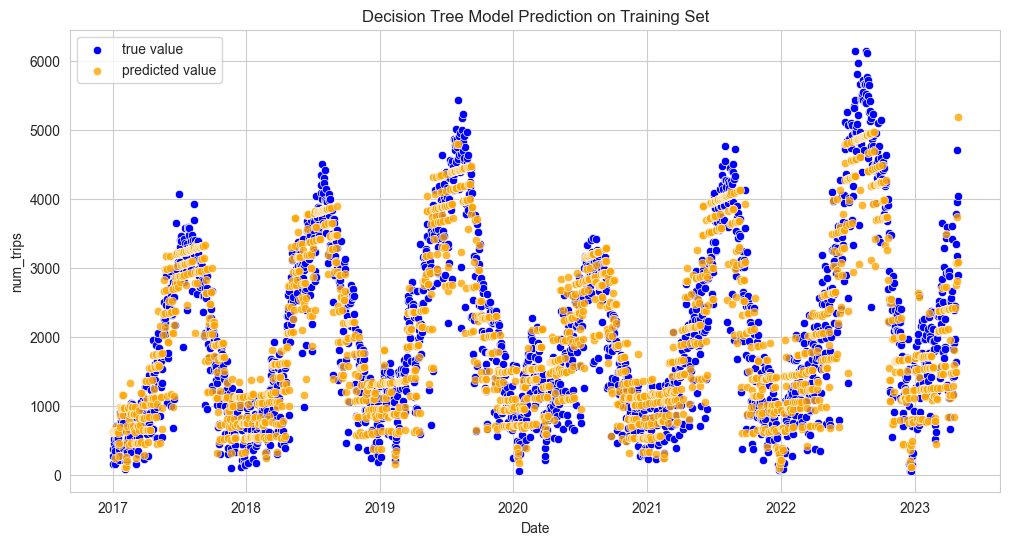

In [22]:
tree = DecisionTreeRegressor(max_depth = 6)
tree.fit(bike_train[['max_temp','total_precip']],bike_train['adj_num_trips'])
pred = tree.predict(bike_train[['max_temp','total_precip']])
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=bike_train['Date'], y=bike_train['num_trips'], color='blue', ax=ax, label='true value')
sns.scatterplot(x=bike_train['Date'], y=pred*bike_train['trend'], color='orange', ax=ax, alpha=0.8, label='predicted value')

plt.title('Decision Tree Model Prediction on Training Set')
plt.legend()
plt.show()

We will test this model on the test set.

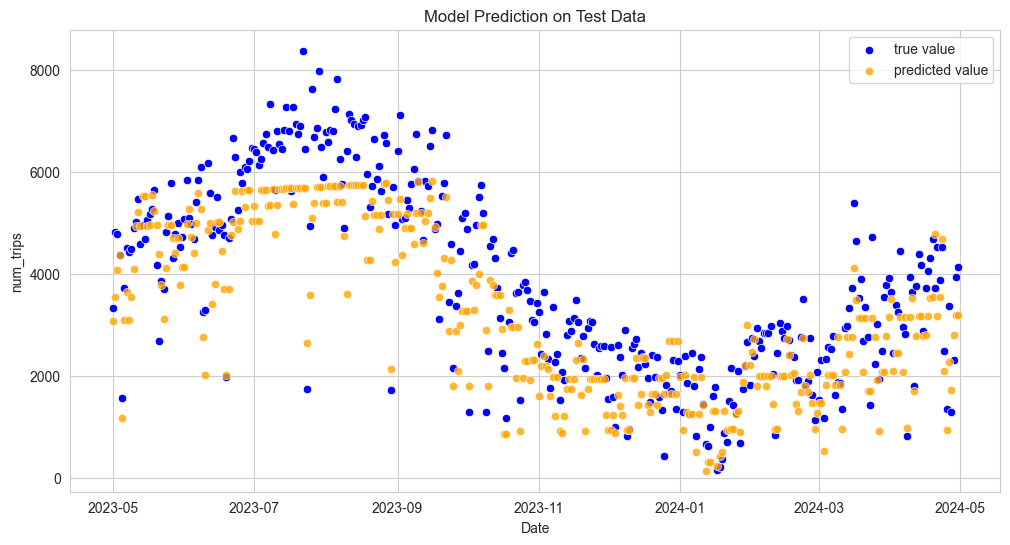

In [23]:
tree = DecisionTreeRegressor(max_depth = 6, random_state = 16)
tree.fit(bike_train[['max_temp', 'total_precip']], bike_train['adj_num_trips'])
pred = tree.predict(bike_test[['max_temp', 'total_precip']])
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=bike_test['Date'], y=bike_test['num_trips'], color='blue', ax=ax, label='true value')
sns.scatterplot(x=bike_test['Date'], y=pred*bike_test['trend'], color='orange', ax=ax, alpha=0.8, label='predicted value')

plt.title('Model Prediction on Test Data')
plt.legend()
plt.show()

In [24]:
print('The rmse of the decision tree regressor model on test data is ', np.sqrt(mean_squared_error(bike_test['num_trips'], pred*bike_test['trend'])))

The rmse of the decision tree regressor model on test data is  913.490309433045


## XGBoost

Now we consider gradient boost based on decision tree regressors.

In [25]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [26]:
from xgboost import XGBRegressor

In [27]:
# specify a set of learning rate
rates = [0.01, 0.05, 0.1, 0.3, 0.5]

In [28]:
# specify a set of n_estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

In [29]:
# specify features
features = ['max_temp', 'total_precip', 'day_length', 'snow_on_ground', 'max_gust']

In [30]:
# initialize the rmse arrays
rmses_xgb_train = np.zeros((5, 2**len(features)-1, len(rates), len(n_estimators)))
rmses_xgb_val = np.zeros((5, 2**len(features)-1, len(rates), len(n_estimators)))

In [31]:
cv_count = 0
for train_index, test_index in kfold.split(bike_train):
    cv_train = bike_train.loc[train_index]
    cv_val = bike_train.loc[test_index]
    feature_count = 0
    for feature in powerset(features):
        feature = list(feature)
        if len(feature)>0:
            print(f'feature_count = {feature_count}, fitting models with {feature}')
            for i, rate in enumerate(rates):
                for j, n in enumerate(n_estimators):
                    xgb_reg = XGBRegressor(learning_rate=rate, max_depth=1, n_estimators=n, random_state=16)
                    xgb_reg.fit(cv_train[feature], cv_train['adj_num_trips'])
                    pred = xgb_reg.predict(cv_val[feature])
                    rmses_xgb_val[cv_count, feature_count, i, j] = np.sqrt(mean_squared_error(pred*cv_val['trend'],cv_val['num_trips']))
            feature_count += 1
    cv_count += 1

feature_count = 0, fitting models with ['max_temp']
feature_count = 1, fitting models with ['total_precip']
feature_count = 2, fitting models with ['day_length']
feature_count = 3, fitting models with ['snow_on_ground']
feature_count = 4, fitting models with ['max_gust']
feature_count = 5, fitting models with ['max_temp', 'total_precip']
feature_count = 6, fitting models with ['max_temp', 'day_length']
feature_count = 7, fitting models with ['max_temp', 'snow_on_ground']
feature_count = 8, fitting models with ['max_temp', 'max_gust']
feature_count = 9, fitting models with ['total_precip', 'day_length']
feature_count = 10, fitting models with ['total_precip', 'snow_on_ground']
feature_count = 11, fitting models with ['total_precip', 'max_gust']
feature_count = 12, fitting models with ['day_length', 'snow_on_ground']
feature_count = 13, fitting models with ['day_length', 'max_gust']
feature_count = 14, fitting models with ['snow_on_ground', 'max_gust']
feature_count = 15, fitting models 

feature_count = 15, fitting models with ['max_temp', 'total_precip', 'day_length']
feature_count = 16, fitting models with ['max_temp', 'total_precip', 'snow_on_ground']
feature_count = 17, fitting models with ['max_temp', 'total_precip', 'max_gust']
feature_count = 18, fitting models with ['max_temp', 'day_length', 'snow_on_ground']
feature_count = 19, fitting models with ['max_temp', 'day_length', 'max_gust']
feature_count = 20, fitting models with ['max_temp', 'snow_on_ground', 'max_gust']
feature_count = 21, fitting models with ['total_precip', 'day_length', 'snow_on_ground']
feature_count = 22, fitting models with ['total_precip', 'day_length', 'max_gust']
feature_count = 23, fitting models with ['total_precip', 'snow_on_ground', 'max_gust']
feature_count = 24, fitting models with ['day_length', 'snow_on_ground', 'max_gust']
feature_count = 25, fitting models with ['max_temp', 'total_precip', 'day_length', 'snow_on_ground']
feature_count = 26, fitting models with ['max_temp', 'tot

In [32]:
# compute the average of rmses
avg_rmses_xgb_val = np.zeros((2**len(features)-1, len(rates), len(n_estimators)))
for k in range(2**len(features)-1):
    for i in range(len(rates)):
        for j in range(len(n_estimators)):
            avg_rmses_xgb_val[k,i,j] = rmses_xgb_val[:,k,i,j].mean()

In [33]:
ind_val_xgb = np.unravel_index(np.argmin(avg_rmses_xgb_val, axis=None), avg_rmses_xgb_val.shape)
print(ind_val_xgb)

(15, 2, 8)


In [40]:
print(f'The minimum validation rmse occurs when features = [max_temp, total_precip, day_length], learning rate = {rates[ind_val_xgb[1]]} and n_estimator = {n_estimators[ind_val_xgb[2]]}')
print('The minimum validation rmse is ', avg_rmses_xgb_val[ind_val_xgb])

The minimum validation rmse occurs when features = [max_temp, total_precip, day_length], learning rate = 0.1 and n_estimator = 200
The minimum validation rmse is  414.171703415119


We will test this model on testing data.

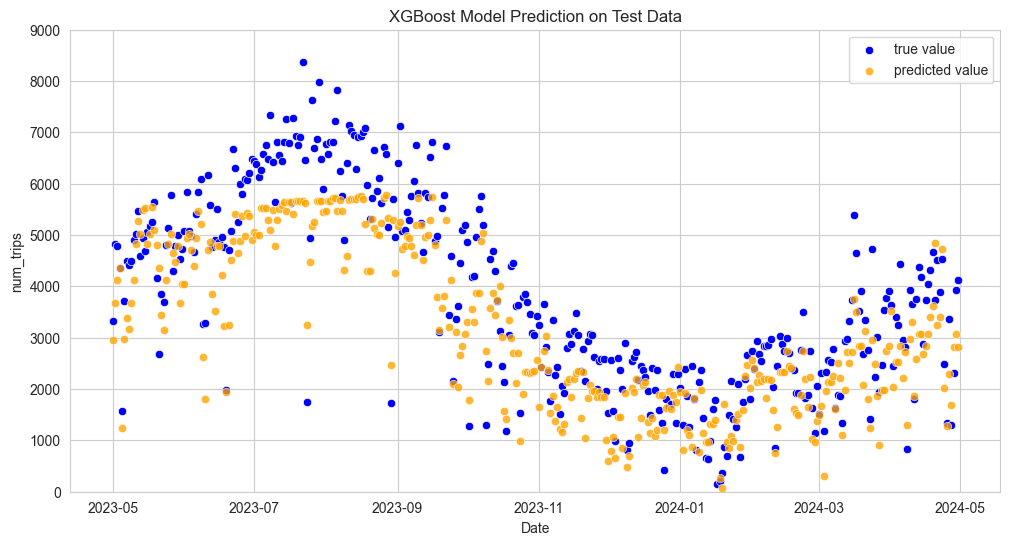

In [46]:
xgb_reg = XGBRegressor(learning_rate=0.1, max_depth=1, n_estimators=200, random_state = 16)
xgb_reg.fit(bike_train[['max_temp', 'total_precip', 'day_length']], bike_train['adj_num_trips'])
pred = xgb_reg.predict(bike_test[['max_temp', 'total_precip', 'day_length']])
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=bike_test['Date'], y=bike_test['num_trips'], color='blue', ax=ax, label='true value')
sns.scatterplot(x=bike_test['Date'], y=pred*bike_test['trend'], color='orange', ax=ax, alpha=0.8, label='predicted value')
ax.set_ylim(bottom=0, top=9000)
plt.title('XGBoost Model Prediction on Test Data')
plt.legend()
plt.show()

In [42]:
print('The rmse of xgb boost model on test data is ', np.sqrt(mean_squared_error(pred*bike_test['trend'], bike_test['num_trips'])))

The rmse of xgb boost model on test data is  942.0339024263342
